In [12]:
import sqlalchemy, os
import pandas as pd
from binance.client import Client
from dotenv import load_dotenv

load_dotenv()

True

In [13]:
API_KEY = os.environ.get("API_KEY")
API_SECRET = os.environ.get("API_SECRET")
client = Client(API_KEY, API_SECRET)

In [14]:
engine = sqlalchemy.create_engine("sqlite:///SLPUSDTstream.db")

In [15]:
df = pd.read_sql("SLPUSDT", engine)

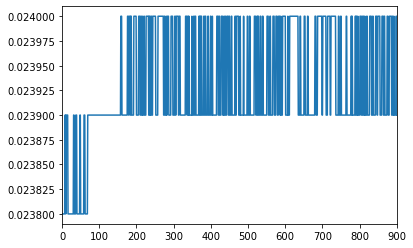

In [16]:
df.Price.plot()

In [12]:
# Trendfollowing
# If the crypto was rising by x % -> Buy
# exit when profit is above 0.15% or loss is crossing -0.15%

In [19]:
def strategy(entry, lookback, qty, open_position=False):
    while True:
        df = pd.read_sql("SLPUSDT", engine)
        lookbackperiod = df.iloc[-lookback:]
        cumret = (lookbackperiod.Price.pct_change() + 1).cumprod() - 1
        if not open_position:
            if cumret[cumret.last_valid_index()] > entry:
                order = client.create_order(
                    symbol="SLPUSDT", side="BUY", type="MARKET", quantity=qty
                )
                print(order)
                open_position = True
                break

    if open_position:
        while True:
            df = pd.read_sql("SLPUSDT", engine)
            sincebuy = df.loc[
                df.Time > pd.to_datetime(order["transactTime"], unit="ms")
            ]

            if len(sincebuy) > 1:
                sincebuyret = (sincebuy.Price.pct_change() + 1).cumprod() - 1
                last_entry = sincebuyret[sincebuyret.last_valid_index()]
                if last_entry > 0.0015 or last_entry < -0.0015:
                    order = client.create_order(
                        symbol="SLPUSDT", side="SELL", type="MARKET", quantity=qty
                    )
                    print(order)
                    break

In [22]:
strategy(0.001, 60, 450)

{'symbol': 'SLPUSDT', 'orderId': 240663505, 'orderListId': -1, 'clientOrderId': '9nlWLwi7OpQvMB0ye4iwa9', 'transactTime': 1645297055053, 'price': '0.00000000', 'origQty': '450.00000000', 'executedQty': '450.00000000', 'cummulativeQuoteQty': '10.80000000', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'BUY', 'fills': [{'price': '0.02400000', 'qty': '450.00000000', 'commission': '0.00002014', 'commissionAsset': 'BNB', 'tradeId': 68789567}]}
{'symbol': 'SLPUSDT', 'orderId': 240663852, 'orderListId': -1, 'clientOrderId': 'XQcKfZW1hGH4s7crvOaf1U', 'transactTime': 1645297123930, 'price': '0.00000000', 'origQty': '450.00000000', 'executedQty': '450.00000000', 'cummulativeQuoteQty': '10.75500000', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'SELL', 'fills': [{'price': '0.02390000', 'qty': '450.00000000', 'commission': '0.00002013', 'commissionAsset': 'BNB', 'tradeId': 68789617}]}
